In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("darkgrid")

import common_functions as cf

## Import Data

In [2]:
df_all = pd.read_pickle("merged_df.pkl")

# Feature engineering (basic)

In [50]:
df_all.tail(2)

,rotR_x,rotR_y,rotR_z,acc_x,acc_y,acc_z,or_x,or_y,or_z,grav_x,grav_y,grav_z,action,label,action_num
time,,,,,,,,,,,,,,,
242,-0.035366,0.023780,-0.089024,0.003418,0.003174,0.014893,0.63,0.6,3.43,0.908691,-0.368652,0.194580,t_stand_hold_DrinkCup_10ml_1s_right,1,86
243,-0.048171,-0.008537,-0.079268,0.001709,0.009033,0.018311,0.64,0.6,3.43,0.910889,-0.363281,0.194824,t_stand_hold_DrinkCup_10ml_1s_right,1,86


In [4]:
df_fe = cf.fe_basic_features(df_all)

# Feature engineering (Rolling)
rolling function takes an amount of directly preceding values to generate stuff like mean, median etc. So for my later input data, I don't need anything else than a set of preceding motion data.

In [5]:
ROLL_STEPS = 100

In [58]:
roll_df =  cf.fe_roll_features(df_fe,ROLL_STEPS)

In [52]:
roll_df.tail(2)

,accel_norm,accel_norm_rmean,accel_norm_rstd,accel_norm_rmed,rotR_x,rotR_x_rmean,rotR_x_rstd,rotR_x_rmed,rotR_y,rotR_y_rmean,...,grav_y_rmean,grav_y_rstd,grav_y_rmed,grav_z,grav_z_rmean,grav_z_rstd,grav_z_rmed,action,label,action_num
time,,,,,,,,,,,,,,,,,,,,,
242,1.004687,1.006443,0.055150,0.999673,-0.035366,0.027171,0.233537,-0.021037,0.023780,-0.052390,...,-0.674055,0.18862,-0.774902,0.194580,0.260559,0.104118,0.222656,t_stand_hold_DrinkCup_10ml_1s_right,1,86
243,1.001875,1.005045,0.053434,0.999673,-0.048171,0.028195,0.232973,-0.021037,-0.008537,-0.054134,...,-0.668911,0.19002,-0.771606,0.194824,0.258062,0.102645,0.219849,t_stand_hold_DrinkCup_10ml_1s_right,1,86


In [69]:
roll = roll_df.iloc[-1]  # If deployment, take last part
roll = np.asarray(roll).reshape(1,-1)

In [60]:
type(roll)

numpy.ndarray

In [64]:
if type(roll) == np.ndarray :
    print("hi")

hi


In [66]:
roll = np.asarray(roll)

In [70]:
roll.shape

(1, 55)

In [56]:
roll_df

array([[1.0018745376671518, 1.0050450856267346, 0.05343384321146245,
        0.9996734753860312, -0.04817073170731708, 0.02819512195121959,
        0.2329729074251666, -0.021036585365853663, -0.00853658536585366,
        -0.05413414634146338, 0.28383883309369773, 0.005182926829268294,
        -0.07926829268292684, -0.20182926829268297, 0.24168903594262847,
        -0.09146341463414635, 0.001708984375, 0.00251708984375,
        0.04836928678392995, 0.0023193359375, 0.009033203125,
        -0.00668212890625, 0.07137936853915285, -0.0150146484375,
        0.018310546875, 0.00052490234375, 0.05687698454585839,
        0.004638671875, 0.64, 0.39209999999999995, 0.17280978624551857,
        0.36, 0.6, 0.6667000000000001, 0.05798040421319408, 0.66, 3.43,
        3.3335000000000004, 0.11350588468696697, 3.365, 0.910888671875,
        0.6272607421875, 0.2152633048655556, 0.6121826171875,
        -0.36328125, -0.6689111328125, 0.19001998405624454,
        -0.7716064453125, 0.19482421875, 0.25806

## Data Splitting(Test/train)

In [8]:
train_df_roll,test_df_roll = cf.data_split_TrainTest(roll_df)

## Preprocess (Normalizing)

In [9]:
# from sklearn.preprocessing import StandardScaler

# for act_num in train_df_roll.action_num.unique():
#     std = StandardScaler().set_output(transform='pandas')
#     std.fit(train_df_roll.loc[train_df_roll.action_num == act_num,:"rotR_z_rmed"])
#     train_df_roll.loc[train_df_roll.action_num == act_num,:"rotR_z_rmed"] = std.transform(train_df_roll.loc[train_df_roll.action_num == act_num,:"rotR_z_rmed"])


# for act_num in test_df_roll.action_num.unique():
#     std = StandardScaler().set_output(transform='pandas')
#     std.fit(test_df_roll.loc[test_df_roll.action_num == act_num,:"rotR_z_rmed"])
#     test_df_roll.loc[test_df_roll.action_num == act_num,:"rotR_z_rmed"] = std.transform(test_df_roll.loc[test_df_roll.action_num == act_num,:"rotR_z_rmed"])

In [10]:
#X_train_roll = cf.pre_normalize_tanh(X_train_roll)
#X_test_roll = cf.pre_normalize_tanh(X_test_roll)

## Modeling

### Split Data (Feature/Label)

In [11]:
X_train_roll,y_train_roll = cf.data_split_FeatLabel(train_df_roll)
X_test_roll,y_test_roll = cf.data_split_FeatLabel(test_df_roll)

### Preprocess (Normalizing)

In [13]:
# from sklearn.preprocessing import StandardScaler

# std = StandardScaler().set_output(transform='pandas')
# std.fit(X_train_roll)
# X_train_roll = std.transform(X_train_roll)
# X_test_roll = std.transform(X_test_roll)

### Neurel Network

In [15]:
from tensorflow import keras
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


import tensorflow as tf
import sklearn
tf.random.set_seed(20) # to fix the randomization
import numpy as np
np.random.seed(20)# to fix the randomizationin sklearn
sklearn.random.seed(1)

In [16]:
np.asarray(X_train_roll.iloc[0]).reshape(1,-1)

array([[ 1.01817711,  1.014761  ,  0.04358826,  1.01077922,  0.30487805,
        -0.08839024,  0.46115352,  0.02012195,  0.10792683, -0.05790244,
         0.25876025, -0.00335366,  0.07926829,  0.05258537,  0.16523987,
         0.01128049, -0.1015625 ,  0.00530273,  0.06162395,  0.01245117,
        -0.00683594, -0.01330811,  0.04808149, -0.01208496, -0.00830078,
        -0.00340088,  0.04156665, -0.0065918 , -0.05      , -0.0271    ,
         0.04018379, -0.04      ,  0.67      ,  0.6689    ,  0.12531895,
         0.675     ,  0.43      ,  0.4226    ,  0.11997155,  0.39      ,
        -0.09960938, -0.05415039,  0.07280594, -0.07177734, -0.9230957 ,
        -0.9016748 ,  0.13493224, -0.92626953,  0.37084961,  0.36723145,
         0.16050718,  0.36865234]])

In [39]:
input_dim = X_train_roll.shape[1]
cnn = Sequential()
cnn.add(Dense(100, input_dim=input_dim, activation='relu'))
cnn.add(Dropout(rate =0.2)) # drop some of the neurals in the back prop. analysis to avoid overfitting
cnn.add(BatchNormalization())
cnn.add(Dense(40, activation='relu'))
cnn.add(Dropout(rate =0.5))
cnn.add(BatchNormalization())
cnn.add(Dense(20, activation='relu'))
cnn.add(Dropout(rate =0.4))
cnn.add(BatchNormalization())
cnn.add(Dense(1, activation='sigmoid'))

In [40]:
#print(cnn.summary())

In [41]:
opt = keras.optimizers.Adam(learning_rate=0.005)

cnn.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

X_train, val_X, y_train, val_y = train_test_split(X_train_roll, y_train_roll, shuffle=True,test_size=0.2 )

In [42]:
X_train_arr = np.asarray(X_train_roll)
y_train_arr = np.asarray(y_train_roll)
X_test_arr = np.asarray(X_test_roll)
y_test_arr = np.asarray(y_test_roll)
val_X =  np.asarray(val_X)
val_y =  np.asarray(val_y)

In [43]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=0, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [44]:
history = cnn.fit(X_train_arr, y_train_arr, epochs=100, batch_size=250,callbacks=[es,mc]
                  , validation_data=(val_X,val_y)
                  )


Epoch 1/100
117/117 [==============================] - ETA: 0s - loss: 0.4025 - accuracy: 0.8115
Epoch 1: val_accuracy improved from -inf to 0.71382, saving model to best_model.h5
117/117 [==============================] - 6s 18ms/step - loss: 0.4025 - accuracy: 0.8115 - val_loss: 0.5006 - val_accuracy: 0.7138
Epoch 2/100
114/117 [============================>.] - ETA: 0s - loss: 0.1813 - accuracy: 0.9319
Epoch 2: val_accuracy improved from 0.71382 to 0.84997, saving model to best_model.h5
117/117 [==============================] - 2s 17ms/step - loss: 0.1796 - accuracy: 0.9328 - val_loss: 0.3167 - val_accuracy: 0.8500
Epoch 3/100
114/117 [============================>.] - ETA: 0s - loss: 0.1219 - accuracy: 0.9568
Epoch 3: val_accuracy improved from 0.84997 to 0.95616, saving model to best_model.h5
117/117 [==============================] - 2s 16ms/step - loss: 0.1219 - accuracy: 0.9569 - val_loss: 0.1089 - val_accuracy: 0.9562
Epoch 4/100
114/117 [============================>.] - ETA

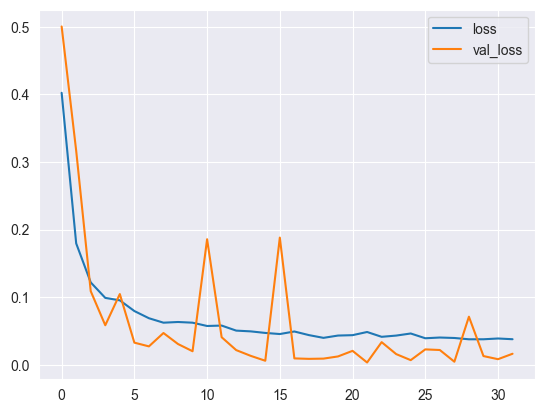

In [45]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss',"val_loss"]].plot()
plt.show()

#### Evaluation

- Evaluate best model which was monitored and saved

In [46]:
best_saved_model = load_model('best_model.h5')
_, train_acc = best_saved_model.evaluate(X_train_arr, y_train_arr, verbose=0)
_, test_acc = best_saved_model.evaluate(X_test_arr, y_test_arr, verbose=0)
print('Train: %.2f, Test: %.2f' % (train_acc*100, test_acc*100))

Train: 99.95, Test: 89.01


In [47]:

best_model_predictions = best_saved_model.predict(X_test_arr)
mae = round(mean_absolute_error(y_test_roll, best_model_predictions),3)
print("mean absolute error is",mae)

745/745 [==============================] - 4s 5ms/step
mean absolute error is 0.113


In [48]:
# convert predicted label rom analog to binary value
bin_best_model_predictions=[]
for val in best_model_predictions:
    if val >=0.5:
        bin_best_model_predictions.append(1)
    else:
        bin_best_model_predictions.append(0)

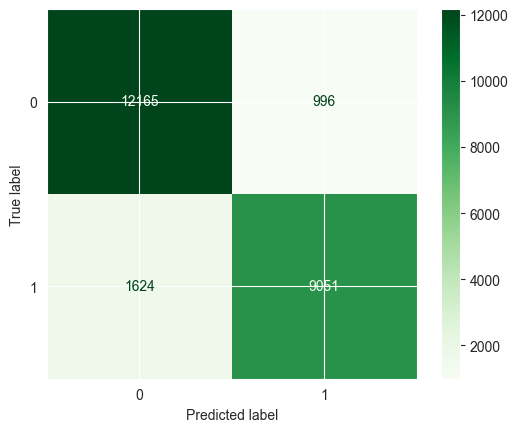

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(bin_best_model_predictions, y_test_roll)
conf_mat_disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
conf_mat_disp.plot(cmap='Greens')
plt.show()

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


import tensorflow as tf
import sklearn
tf.random.set_seed(20) # to fix the randomization
import numpy as np
np.random.seed(20)# to fix the randomizationin sklearn
sklearn.random.seed(1)

In [ ]:
my_cnn = DecisionTreeClassifier()
my_cleaner = CleanDataTransformer(columns=["PoolArea","ScreenPorch"])